# Logistic Regression using Statsmodel

This notebook provides an example code of predicting whether an employee will churn or not given the explanatory variables. 

Dependent variable - <b>Churn (1-yes, 0-no)</b> 

The general sequence of steps that we will follow is the following:

- Describing the data (checking for NAs, 0 variance,summary statistics of our variables, etc)
- Checking for correlations between numeric variables
- Creating dummy variables from categorical variables
- Logistic Regression from statsmodel and interpretation of marginal effects
- Predicting probabilities
- Getting confusion matrix
- Calculating Sensitivity (recall), specificity, overall accuracy
- Visualising the difference between logistic regression and linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit

In [2]:
#read data
data=pd.read_csv("Turnover.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


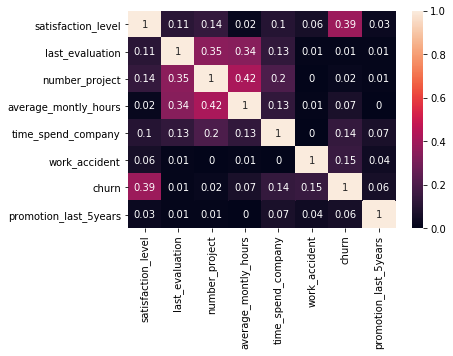

In [4]:
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

There are no highly correlated variables.

In [5]:
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
churn                    0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


No missing values.

In [6]:
print(data.var()==0)

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
churn                    False
promotion_last_5years    False
dtype: bool


No variable with 0 variance.

In [7]:
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("\n","****************************")

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

 ****************************
low       7316
medium    6446
high      1237
Name: salary, dtype: int64

 ****************************


No categorical variable with only one category.

In [8]:
#Let's create dummy variables from categorical variables
data=pd.get_dummies(data,drop_first=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
work_accident             14999 non-null int64
churn                     14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null 

In [10]:
#let's see percenatage of employees who didn't churn,
#and percenatage of employees who churned
print((data.churn.value_counts()/len(data)*100).round(2))

0    76.19
1    23.81
Name: churn, dtype: float64


<b>76% of employees haven't churned. This means that without any model we will probably clasify a new record (a new employee) as 0 with 76% accuracy, but we want to do better than this very naive classification.</b>

In [11]:
X=data.drop("churn",axis=1)
Y=data.churn

In [12]:
model=Logit.from_formula(formula="churn~"+"+".join(X.columns),data=data)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:                  0.2195
Time:                        17:54:20   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.6570      0.189     -8.784      0.000      -2.027      -1.287
satisfaction_level        -4.1357      0.098    -42.177      0.000      -4.328      -3.944
last_evaluation            0.7309      0.149      4.899      0.000       0.439       1.023
number_project            -0.3151      0.021    -14.775      0.000      -0.357      -0.273
average_montly_hours       0.0045      0.001      8.643      0.000       0.003       0.005
time_spend_company         0.2678      0.016     17.192      0.000       0.237       0.298
work_accident             -1.5298      0.090    -17.083      0.000      -1.705      -1.354
promotion_last_5years     -1.4301      0.258     -5.552      0.000      -1.935      -0.925
department_RandD          -0.4016      0.136     -2.962      0.003      -0.667      -0.136
department_accounting      0.1807      0.122      1.480      0.139      -0.059       0.420
department_hr              0.4131      0.121      3.415      0.001       0.176       0.650
department_management     -0.2677      0.152     -1.765      0.078      -0.565       0.030
department_marketing       0.1686      0.122      1.386      0.166      -0.070       0.407
department_product_mng     0.0275      0.120      0.230      0.818      -0.207       0.262
department_sales           0.1419      0.089      1.601      0.109      -0.032       0.316
department_support         0.2307      0.097      2.391      0.017       0.042       0.420
department_technical       0.2509      0.093      2.685      0.007       0.068       0.434
salary_low                 1.9441      0.129     15.111      0.000       1.692       2.196
salary_medium              1.4132      0.129     10.924      0.000       1.160       1.667
==========================================================================================
"""

- <b> For a one-unit increase in satisfaction_level we expect on average a -4.1357 decrease in the log-odds of the dependent variable churn, holding all other independent variables constant.</b>
- <b> For employees with low salaries, we expect on average a 1.9441 increase in the log-odds of the dependent variable churn compared to the employees with high salaries.</b>

As we want to interpret probabilites, let's get marginal effects.

In [14]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -0.5700      0.010    -54.709      0.000      -0.590      -0.550
last_evaluation            0.1007      0.021      4.911      0.000       0.061       0.141
number_project            -0.0434      0.003    -15.071      0.000      -0.049      -0.038
average_montly_hours       0.0006   7.05e-05      8.716      0.000       0.000       0.001
time_spend_company         0.0369      0.002     17.744      0.000       0.033       0.041
work_accident             -0.2108      0.012    -17.541      0.000      -0.234      -0.187
promotion_last_5years     -0.1971      0.035     -5.566      0.000      -0.267      -0.128
department_RandD          -0.0554      0.019     -2.965      0.003      -0.092      -0.019
department_accounting      0.0249      0.017      1.480      0.139      -0.008       0.058
department_hr              0.0569      0.017      3.419      0.001       0.024       0.090
department_management     -0.0369      0.021     -1.765      0.078      -0.078       0.004
department_marketing       0.0232      0.017      1.386      0.166      -0.010       0.056
department_product_mng     0.0038      0.016      0.230      0.818      -0.029       0.036
department_sales           0.0196      0.012      1.601      0.109      -0.004       0.044
department_support         0.0318      0.013      2.392      0.017       0.006       0.058
department_technical       0.0346      0.013      2.687      0.007       0.009       0.060
salary_low                 0.2679      0.017     15.426      0.000       0.234       0.302
salary_medium              0.1948      0.018     11.030      0.000       0.160       0.229
==========================================================================================
"""

- <b> An Incremental increase in satisfaction level will decrease the probability of churn on average by 57% when other factors are held constant.</b>
- <b>Employees with low salary have on average 26.8% higher probability of churn compared to employees with high salaries.</b>

In [15]:
#let's get predicted probabilities of being churn
y_pred=results.predict(X)
y_pred.head()

0    0.529510
1    0.170499
2    0.541178
3    0.239614
4    0.540200
dtype: float64

<b>The output shows that the first employee has 52.95% probability of churn, the second employee's probability of churn is 17%, and the fifth employee's probability of churn is 54%. If we chose treshold equal to 50%, then the 1st, 3rd and 5th employee will be classified as 1 (churn), on the other hand 2nd and 4th employee will be classified as 0 (don't churn). </b>

To calculate overall accuracy, recall and specificity we need to construct confusion matrix (CM). Let's use <code>pred_table()</code> function from statsmodel to get CM.

In [16]:
#default treshold is 0.5 
results.pred_table().T

array([[10614.,  2301.],
       [  814.,  1270.]])

In [17]:
#let's change treshold from 0.5 to 0.7
results.pred_table(0.7).T

array([[11150.,  3138.],
       [  278.,   433.]])

It can be seen that after changing treshold, we predicted more 0 (11161) and less 1 (1270).

In [18]:
#let's calculate overall accuracy, recall and specificity
Accuracy=(10614+1270)/len(data)
Sensitivity=1270/(2301+1270)
Specificity=10614/(10614+814)
print("Accuracy:",Accuracy)
print("Sensitivity:",Sensitivity)
print("Specificity:",Specificity)

Accuracy: 0.7923194879658644
Sensitivity: 0.3556426771212545
Specificity: 0.9287714385719286


# Let's graphically observe the difference between linear regression and logit models.

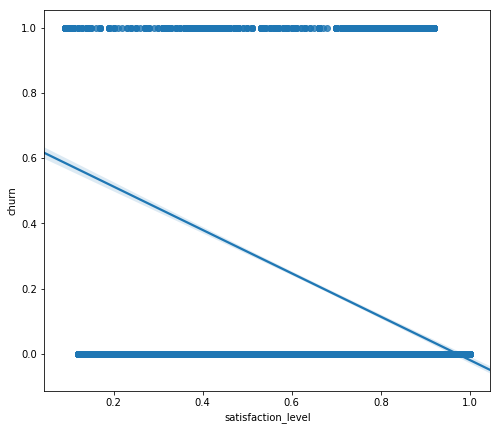

In [20]:
#Linear line fit
plt.figure(figsize=(8,7))
sns.regplot(data.satisfaction_level,data.churn)
plt.show()

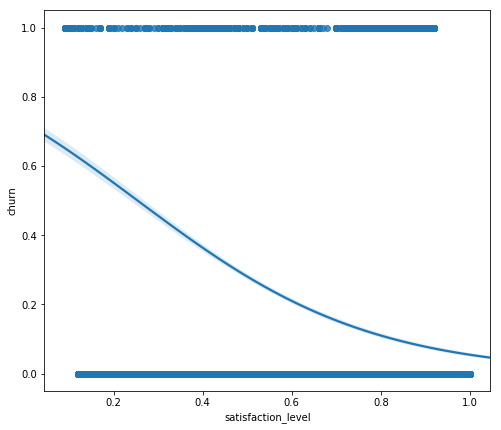

In [19]:
#fitting logit function
plt.figure(figsize=(8,7))
sns.regplot(data.satisfaction_level,data.churn,logistic=True)
plt.show()

From the graphs, we observe that when we use linear line we get negative probabilities, while in case of using logit fit (sigmoid function) we get probabilities in [0,1] range. This is one of the reasons, why we cannot use linear regression when dependent variables is binary. 